In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
data=pd.read_csv("/pubg_data.csv")

In [100]:
data.head(5)

,Unnamed: 0,longestKill,matchDuration,rankPoints,walkDistance
0,0,0.00,1884,1500,588.0
1,1,361.90,1811,1503,2017.0
2,2,0.00,1793,1565,787.8
3,3,0.00,1834,1465,1812.0
4,4,60.06,1326,1480,2963.0


In [101]:
data.tail(10)

,Unnamed: 0,longestKill,matchDuration,rankPoints,walkDistance
490,490,38.850,1325,1763,3259.000
491,491,48.640,1360,-1,423.500
492,492,2.654,1449,-1,69.120
493,493,0.000,1778,-1,2665.000
494,494,18.550,1389,1419,3062.000
495,495,0.000,1960,1483,90.300
496,496,0.000,1329,-1,2.499
497,497,0.000,1401,1368,222.100
498,498,22.280,1393,-1,226.200
499,499,22.020,1869,-1,3039.000


In [102]:
data.describe()

,Unnamed: 0,longestKill,matchDuration,rankPoints,walkDistance
count,500.000000,500.00000,500.000000,500.000000,500.000000
mean,249.500000,21.01366,1584.814000,935.518000,1146.213057
std,144.481833,45.20785,262.399395,734.863218,1247.007716
min,0.000000,0.00000,699.000000,-1.000000,0.000000
25%,124.750000,0.00000,1366.000000,-1.000000,123.625000
50%,249.500000,0.00000,1438.000000,1461.500000,571.950000
75%,374.250000,22.39000,1855.000000,1501.000000,2016.250000
max,499.000000,361.90000,2186.000000,2261.000000,5976.000000


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     500 non-null    int64  
 1   longestKill    500 non-null    float64
 2   matchDuration  500 non-null    int64  
 3   rankPoints     500 non-null    int64  
 4   walkDistance   500 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


In [104]:
data.corr()

,Unnamed: 0,longestKill,matchDuration,rankPoints,walkDistance
Unnamed: 0,1.000000,-0.004709,-0.024083,0.021159,-0.017677
longestKill,-0.004709,1.000000,0.103523,0.093708,0.456100
matchDuration,-0.024083,0.103523,1.000000,0.100960,0.207395
rankPoints,0.021159,0.093708,0.100960,1.000000,-0.015383
walkDistance,-0.017677,0.456100,0.207395,-0.015383,1.000000


In [105]:
data.isnull()

,Unnamed: 0,longestKill,matchDuration,rankPoints,walkDistance
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
495,False,False,False,False,False
496,False,False,False,False,False
497,False,False,False,False,False
498,False,False,False,False,False


In [106]:
data.isnull().sum()

Unnamed: 0       0
longestKill      0
matchDuration    0
rankPoints       0
walkDistance     0
dtype: int64

In [107]:
data=data.drop('Unnamed: 0',axis=1)
data

,longestKill,matchDuration,rankPoints,walkDistance
0,0.00,1884,1500,588.000
1,361.90,1811,1503,2017.000
2,0.00,1793,1565,787.800
3,0.00,1834,1465,1812.000
4,60.06,1326,1480,2963.000
...,...,...,...,...
495,0.00,1960,1483,90.300
496,0.00,1329,-1,2.499
497,0.00,1401,1368,222.100
498,22.28,1393,-1,226.200


In [108]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale_data= sc.fit_transform(data)



In [109]:
scale_data

array([[-0.46528877,  1.14133509,  0.76891497, -0.44809034],
       [ 7.5479753 ,  0.8628546 ,  0.77300145,  0.69900052],
       [-0.46528877,  0.79418818,  0.85745539, -0.28770633],
       ...,
       [-0.46528877, -0.70121385,  0.58910981, -0.7418066 ],
       [ 0.02803956, -0.73173226, -1.27568764, -0.73851544],
       [ 0.02228259,  1.08411307, -1.27568764,  1.5193832 ]])

In [110]:
#pca with one component
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
pca1.fit(scale_data)


PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [119]:
print(pca1.noise_variance_)
print(sum(pca1.explained_variance_ratio_))
P1 = pca1.transform(scale_data)

0.8151318778246829
0.38987378944822476


In [120]:
#pca with 2 components
pca2 = PCA(n_components=2)
pca2.fit(scale_data)
print(pca2.noise_variance_)
print(sum(pca2.explained_variance_ratio_))
P2 = pca2.transform(scale_data)


0.7055838483904724
0.6479136596531542


In [113]:
#pca with 3 components
pca3 = PCA(n_components=3)
pca3.fit(scale_data)
print(pca3.noise_variance_)
print(sum(pca3.explained_variance_ratio_))
P3 = pca3.transform(scale_data)


0.514363735201679
0.8716662480671811


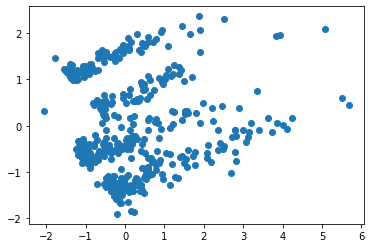

In [114]:
plt.scatter(P1[:500, 0], P2[:500, 1])
plt.show()

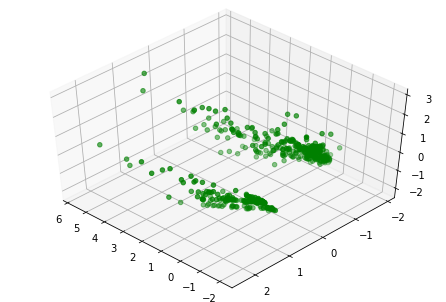

In [115]:
from mpl_toolkits.mplot3d import Axes3D
fig_p3 = plt.figure()
ax = Axes3D(fig_p3, elev=48, azim=134)
ax.scatter(P1[:500, 0], P2[:500, 1], P3[:500, 2],color='green')
fig_p3.show()

In [123]:
#initializing clustering with pca 2 components
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=2).fit(P2)

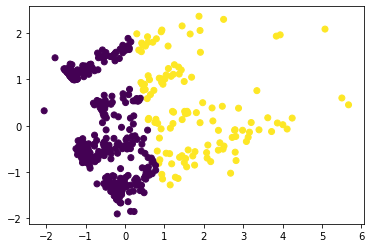

In [124]:
plt.scatter(P2[:500, 0], P2[:500, 1], c=kms.labels_[:500])
plt.show()

In [125]:
kms3 = KMeans(n_clusters=3).fit(P2)
kms4 = KMeans(n_clusters=4).fit(P2)
kms5 = KMeans(n_clusters=5).fit(P2)


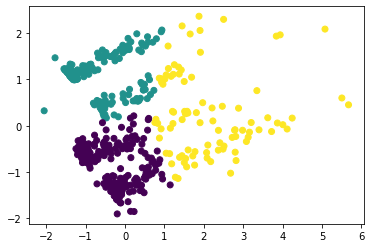

In [126]:
plt.scatter(P2[:500, 0], P2[:500, 1], c=kms3.labels_[:500])
plt.show()

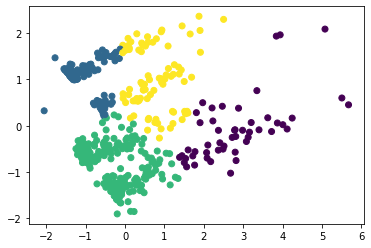

In [127]:
plt.scatter(P2[:500, 0], P2[:500, 1], c=kms4.labels_[:500])
plt.show()

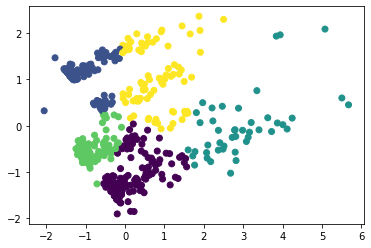

In [128]:
plt.scatter(P2[:500, 0], P2[:500, 1], c=kms5.labels_[:500])
plt.show()

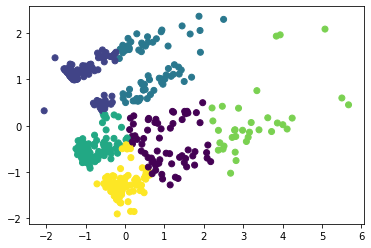

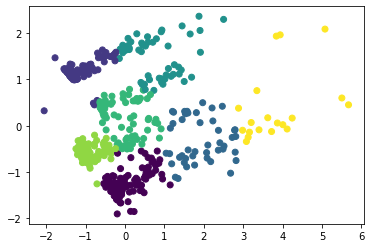

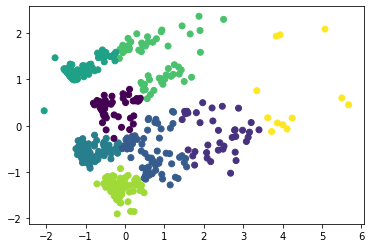

In [129]:
kms6 = KMeans(n_clusters=6).fit(P2)
kms7 = KMeans(n_clusters=7).fit(P2)
kms8 = KMeans(n_clusters=8).fit(P2)
plt.scatter(P2[:500, 0], P2[:500, 1], c=kms6.labels_[:500])
plt.show()
plt.scatter(P2[:500, 0], P2[:500, 1], c=kms7.labels_[:500])
plt.show()
plt.scatter(P2[:500, 0], P2[:500, 1], c=kms8.labels_[:500])
plt.show()

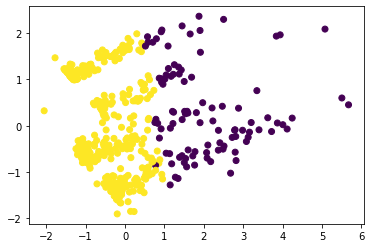

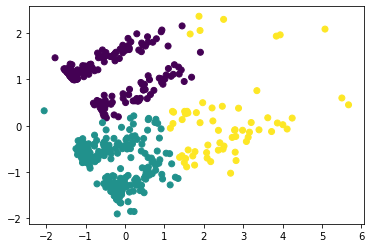

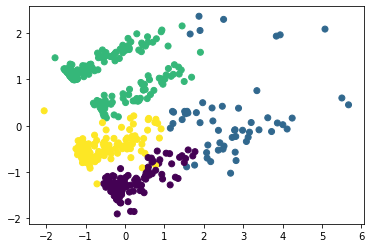

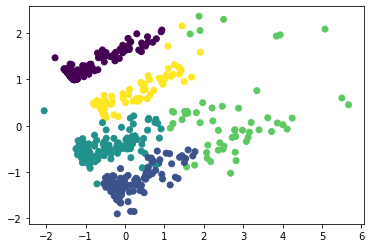

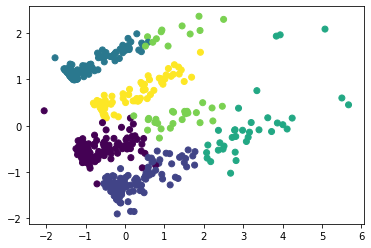

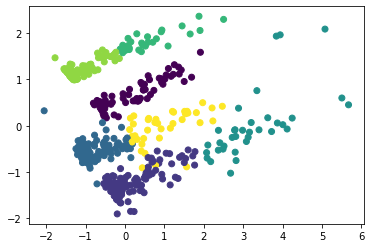

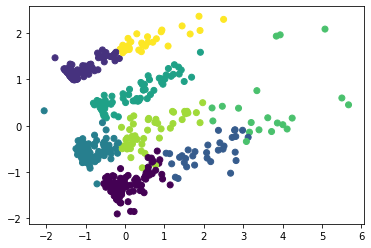

In [130]:
#pca with 3 components
kms = KMeans(n_clusters=2).fit(P3)
kms3 = KMeans(n_clusters=3).fit(P3)
kms4 = KMeans(n_clusters=4).fit(P3)
kms5 = KMeans(n_clusters=5).fit(P3)
kms6 = KMeans(n_clusters=6).fit(P3)
kms7 = KMeans(n_clusters=7).fit(P3)
kms8 = KMeans(n_clusters=8).fit(P3)
plt.scatter(P3[:500, 0], P3[:500, 1], c=kms.labels_[:500])
plt.show()
plt.scatter(P3[:500, 0], P3[:500, 1], c=kms3.labels_[:500])
plt.show()
plt.scatter(P3[:500, 0], P3[:500, 1], c=kms4.labels_[:500])
plt.show()
plt.scatter(P3[:500, 0], P3[:500, 1], c=kms5.labels_[:500])
plt.show()
plt.scatter(P3[:500, 0], P3[:500, 1], c=kms6.labels_[:500])
plt.show()
plt.scatter(P3[:500, 0], P3[:500, 1], c=kms7.labels_[:500])
plt.show()
plt.scatter(P3[:500, 0], P3[:500, 1], c=kms8.labels_[:500])
plt.show()